# 17企业级RAG：权限、共享与内容安全的全链路方案

>在之前的教程中，我们主要探讨了个人级 RAG（检索增强生成）应用的实现方式和优化技巧。但在企业级应用中，知识管理和智能检索的需求更为复杂，涉及多个部门，各自具备独立的业务领域、数据存储方式和算法需求。因此，高效管理和检索知识，确保不同部门灵活访问知识库，同时满足数据隔离、安全性和共享机制，是企业级知识管理系统的核心挑战。本章将介绍如何使用 LazyLLM 快速构建面向企业级的数据库管理和检索召回服务，满足上述复杂需求。

# 一、企业级知识库的多样性需求

在企业实际应用中，知识库不再是简单的信息堆叠，而需要面对来自权限、共享方式与安全保障等多个维度的复杂诉求。下面我们从典型场景出发，系统阐述这些多样性需求及其应对策略。

**✅ 场景一：按部门隔离的知识访问（权限管理多样性）**

> **客户背景：大型制造企业**
>
> 企业下设多个职能部门（如研发、采购、销售），各自负责不同领域的信息收集与管理。文档内容涵盖供应链合作、成本核算、产品规划等，信息敏感度高，内部访问需严格隔离。
>
> - 部门专属知识库：各业务单元可自主维护产品文档、市场分析、财务报告等专业内容，系统自动隔离非授权访问。
> - 智能标签体系：支持"研发-技术白皮书"、"市场-竞品分析"等专业标签体系，实现精准检索与受控共享。
> - 管理驾驶舱：高管层可通过"战略视图"标签获取跨部门知识摘要，确保决策支持的同时维护数据安全。

**✅ 场景二：多种共享方式的协同需求（共享方式多样性）**

> **客户背景：咨询服务公司**
>
> 公司经常与不同客户进行联合项目，涉及文档共享、阶段报告、项目材料和算法资源等。客户使用的工具和偏好多样，需要灵活的共享机制以满足业务合作与文档保密的平衡。
>
> - 算法资源共享：支持llm模型、embedding模型、检索算法等核心组件在企业内部分享复用。
> - 差异化调用的知识复用：一个项目知识库可同时服务内部顾问、客户技术团队及第三方分析机构，能够配置不同的召回规则实现召回解耦，满足多角色精准访问。

**✅ 场景三：多重安全策略保障内容安全（安全保障多样性）**

> **客户背景：金融科技公司**
>
> 知识库包含大量敏感内容，如用户金融行为分析、监管合规方案、审计材料等，对信息安全的要求极高。
>
> **安全需求：**
>
> - 敏感词智能过滤：内置多级敏感词识别策略，结合上下文进行动态判断，在问答与检索过程中自动提示、替换或阻断输出，防止企业内部黑名单、客户机密、涉密术语等信息泄露。
> - 全链路知识加密：知识文档在上传、解析、入库、传输及生成阶段均可启用对称或非对称加密机制，确保知识在整个生命周期中不被窃取或篡改。
> - 私有化部署方案：平台可在企业内网私有服务器或专属云环境中完成全栈部署，包括知识库、向量引擎、检索模块与模型推理服务，确保知识数据不经公网传输。系统可无缝集成企业认证、权限与日志体系，形成闭环安全防护结构。

企业级应用场景对知识库提出了更多维度的要求，LazyLLM 针对这些需求，在权限管理、共享模式以及安全保障三方面提供了解决方案。

# 二、权限多样性以及解决方案

## 1.权限隔离：支持多部门独立知识运营

在大型企业中，各部门通常拥有独立的文档体系，这些文档可能包含敏感的业务信息、内部操作手册或关键流程文件。为了确保信息安全与使用合规，企业对文档的管理能力和隔离机制提出了更高要求。常见的管理难题包括：

- 如何支持知识库的高频更新与维护？ 
- 如果同一篇文档被多个部门使用，需分别入库多次？导致数据冗余和管理困难？

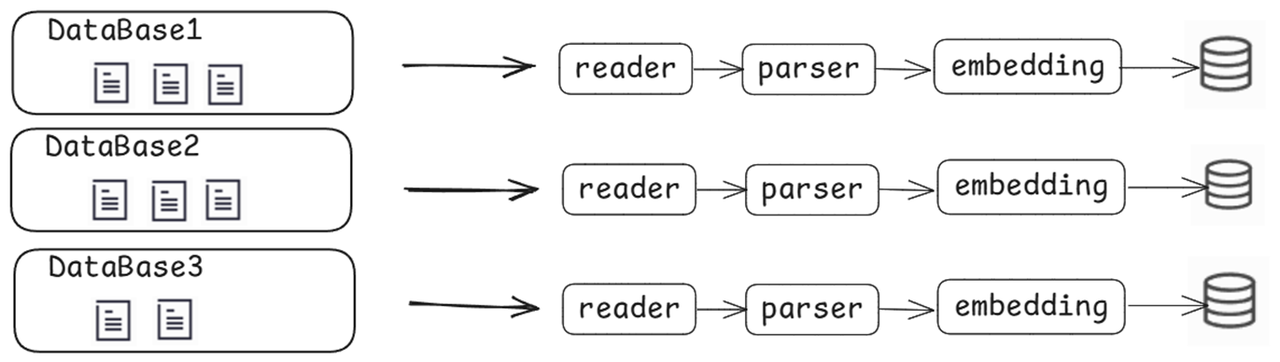

为此，lazyllm内置灵活的文档管理服务，提供了一套完整的**文档增删改查**功能，用户可以方便地添加新文档、修改已有内容、删除过期文档，并在需要时进行检索，确保知识库始终保持最新状态。不同的知识库相互隔离，可帮助企业按部门、岗位、项目等维度灵活划分知识库访问边界，实现“谁能看、看什么、看多少”的可控策略。

例如，在同一知识库存储内，支持利用文档管理组功能进行分组管理，同一文档只需解析一次。

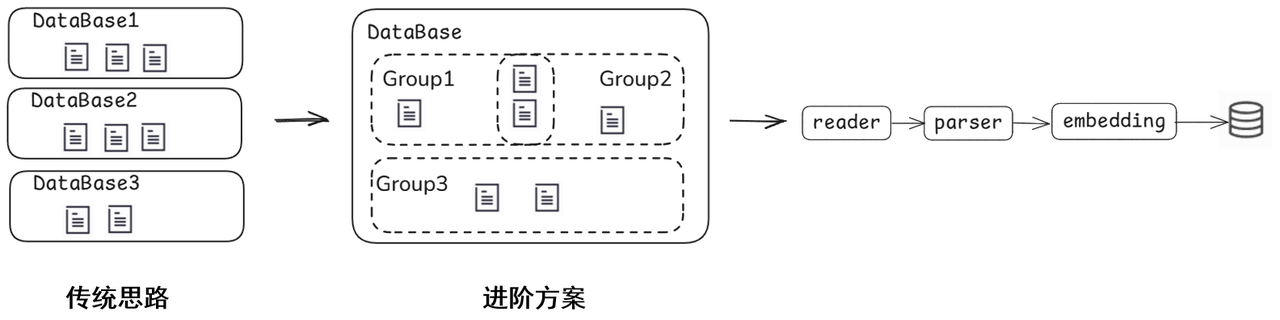

#### 文档管理服务

文档管理服务的启用非常简单，只需要在创建 `document` 对象时，将 `manager` 参数设为 `ui` ，即可开启文档管理功能。例如（[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/main/rag/codes/chapter17/document_manager.py)）：

In [ ]:
from lazyllm.tools import Document
import time

path = "path/to/docs"
docs = Document(path, manager='ui')
# 注册分组
Document(path, name='法务文档管理组', manager=docs.manager)
Document(path, name='产品文档管理组', manager=docs.manager)
# 启动服务
docs.start()
time.sleep(3600)

启动后页面如下：

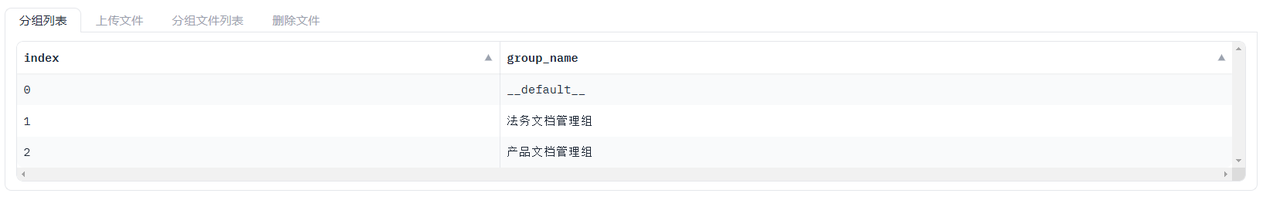

文档管理服务开启后，可在 Web 页面中便捷地查看不同分组内的文档，并支持对文档进行快速增删操作。

#### 文档管理后端 API 服务

该Web服务内置了基于Gradio的默认前端界面。若企业需要定制更专业的前端界面，可通过`manager=True`参数仅启动后端API服务，随后基于接口自由开发个性化前端。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/main/rag/codes/chapter17/document_manager.py)

In [ ]:
from lazyllm.tools import Document
import time

path = "path/to/docs"
docs = Document(path, manager=True)
# 注册分组
Document(path, name='法务文档管理组', manager=docs.manager)
Document(path, name='产品文档管理组', manager=docs.manager)
# 启动服务
docs.start()
time.sleep(3600)

启动后，Redoc 页面如下，展示了可用的后端接口。

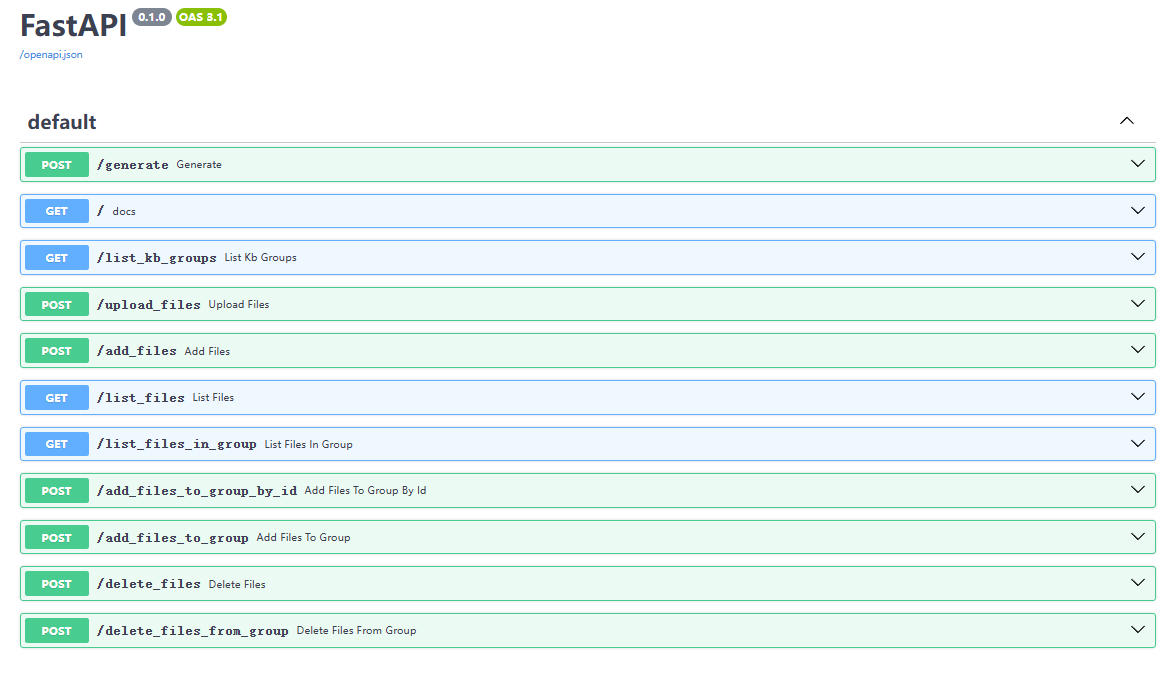

[相关视频：video\17_1_doc_manager.mp4](video/17_1_doc_manager.mp4)


## 2.权限多样性：支持更细粒度的访问控制

在企业实际运营中，权限需求远不止“哪个部门访问哪个文档”这么简单。不同小组、岗位甚至项目成员，常常需要在共享部分知识的同时保护敏感内容不被误读或泄露。为满足这种复杂且多变的需求，LazyLLM 提供了基于标签检索的权限控制能力。企业可为文档打上如部门、岗位、时间、文件类型等多个标签，并为不同角色配置相应的访问权限，实现精细化管理。例如，市场部门可能希望检索与“产品推广”相关的文档，而研发部门可能更关注“技术规格”类的文档。除了基于标签的筛选需求，用户还希望在检索时能够指定特定文档集进行查询，而不是搜索整个知识库。例如，法务部门可能只希望检索最近一年内的合同文件，而不是所有历史合同。因此，系统需要支持针对知识库中的部分文档集合进行精准查询，提升搜索的精准度和效率。

企业需要通过标准化鉴权机制（如基于角色RBAC、基于属性ABAC、基于策略PBAC）精细控制文档访问。

❓ 如何依据标准化鉴权机制组织内容和设置访问权限，确保信息合规使用？

❓ 如何根据权限等级细化访问控制，如同一部门内不同人员拥有不同等级的访问权限？

**LazyLLM解决方案** **——— 基于标签（Tag）的权限控制机制**：

✅ 每个文档可在上传时绑定预定义标签（如部门、项目、安全等级）

✅ 检索时支持基于标签的过滤，仅返回符合条件的内容

🔍 **示例：模拟基于角色的权限控制（RBAC）**

目标：让“法务一部”员工仅能检索本部门的文档

- 定义标签字段：department
- 上传文档时指定：department = 法务一部
- 检索时自动注入过滤条件：filter={"department": "法务一部"}

通过这一机制，实现了**基于角色的隔离访问**，在保障数据安全的同时，也简化了权限策略的实施。

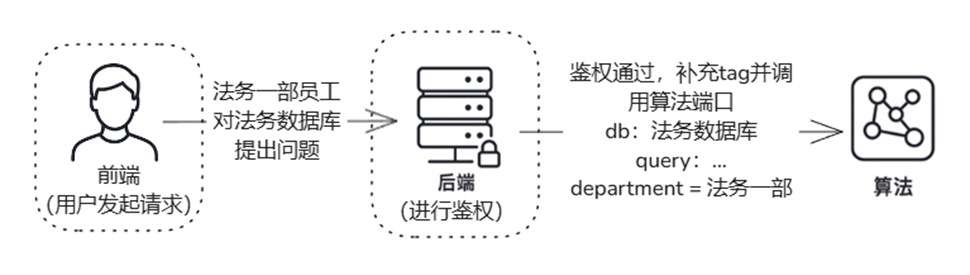

在实际应用中，鉴权逻辑应由后端统一管理，算法侧不直接处理鉴权。这样可以确保权限控制的集中化和安全性，避免因算法侧绕过权限而引发的安全漏洞。

#### 基于标签的访问控制

我们可以通过**元数据（metadata）管理**和**检索过滤**（filter）来实现灵活的分类和查询功能，仅需以下两步：

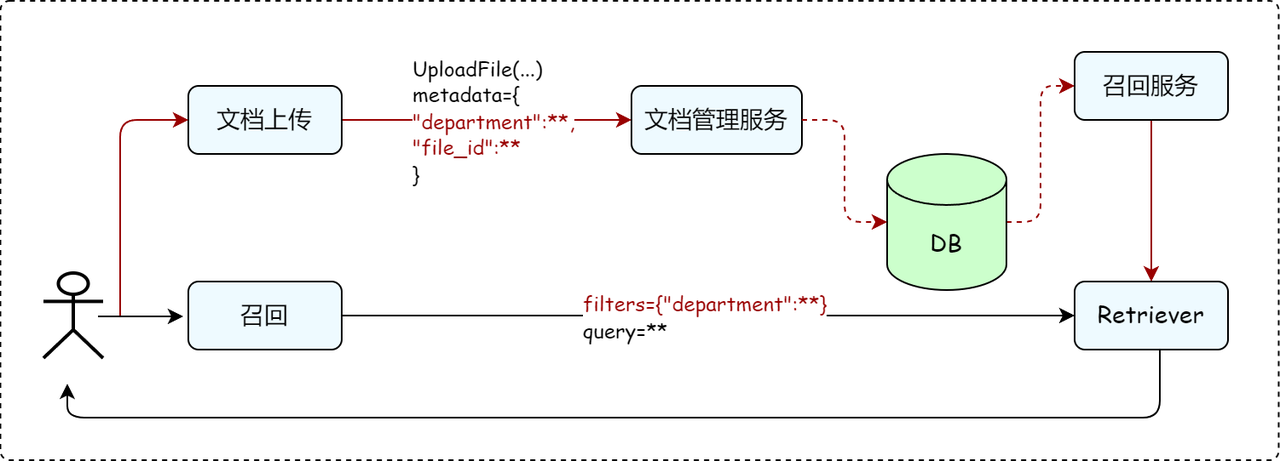

**第一步：Metadata 添加**

使用元数据过滤需指定milvus数据库，并且声明要指定的字段，以部门department为例，示例如下：

In [ ]:
CUSTOM_DOC_FIELDS = {"department": DocField(data_type=DataType.VARCHAR, max_size=65535, default_value=' ')}
milvus_store_conf = {
    'type': 'milvus',
    'kwargs': {
        'uri': os.path.join(db_path, "milvus.db"),
        'index_kwargs': [
            {
                'embed_key': 'bge_m3_dense',
                'index_type': 'IVF_FLAT',
                'metric_type': 'COSINE',
            },
            {
                'embed_key': 'bge_m3_sparse',
                'index_type': 'SPARSE_INVERTED_INDEX',
                'metric_type': 'IP',
            }
        ]

    },
}


law_knowledge_base = Document(
    data_path, 
    name='法务知识库', 
    manager="ui", 
    doc_fields=CUSTOM_DOC_FIELDS,  # 指定要过滤的字段
    store_conf=milvus_store_conf,  # 开启milvus数据库
    embed=OnlineEmbeddingModule(source="glm", embed_model_name="embedding-2"))

在通过文档管理服务上传文件时，用户可为文件指定需要设定的元数据（metadata）分类信息。例如：

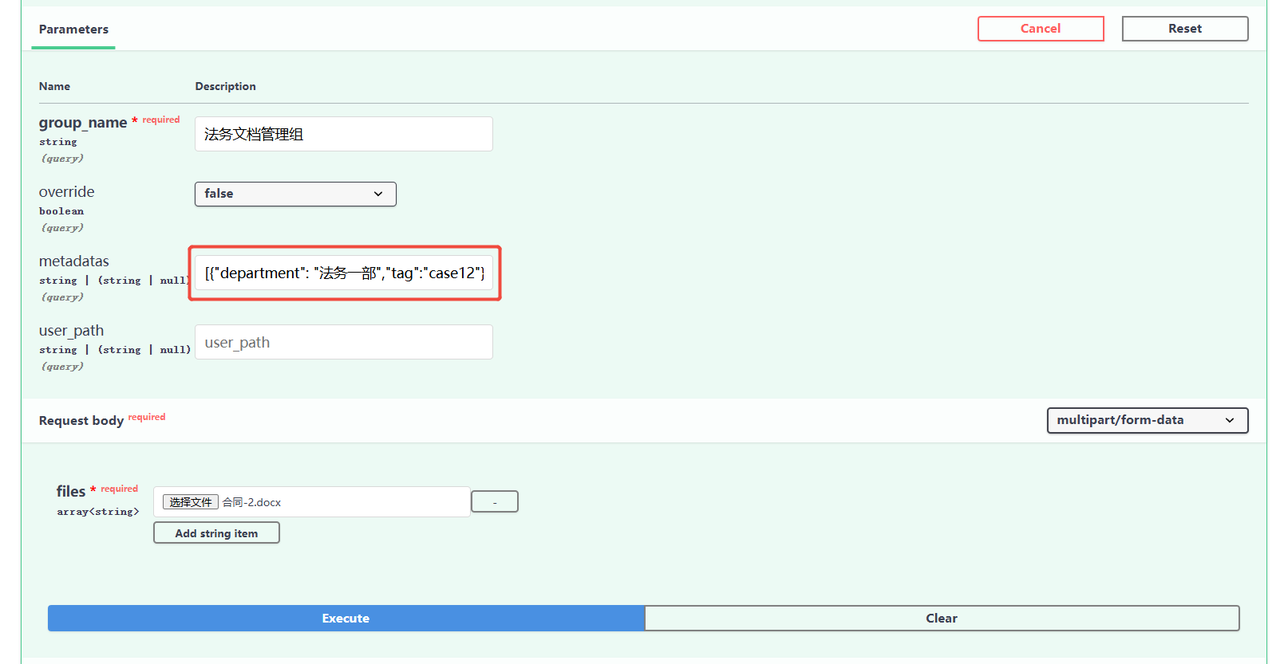

[相关视频：video\17_2_metadata.mp4](video/17_2_metadata.mp4)

**第二步：Metadata 查询**

在查询时，用户可以通过 filter 机制指定需要过滤的分类信息。可以通过以下方式进行筛选来仅检索来自法务一部和法务二部的文档。

In [ ]:
retriever_support = Retriever(
    [law_knowledge_base, support_knowledge_base],
    group_name=...,
    similarity=...,
    topk=2
)

support_question = "客户关于合同投诉的处理方式"
support_res_nodes = retriever_support(
    support_question， 
    filters={'department':['法务一部']}   # 指定已定义的过滤条件
)

[相关视频：video\17_3_filter.mp4](video/17_3_filter.mp4)

通过添加Metadata和定义filter机制，最终实现了对文档的多权限管理。

以下示例同时展示了两种检索方式 ——

- 使用 filter（仅检索“法务一部”文档）
- 不使用 filter（检索所有文档）

该对比仅用于**功能展示目的**，以便理解系统的过滤机制。

在实际应用中，系统可实现**强制绑定过滤条件**，确保用户只能检索其所属部门的文档，从而实现**文档隔离与权限控制的统一**。

 **📌  进阶：细化权限等级的权限控制**

-  等级 1：普通员工，仅能查看基础财务报表。
-  等级 2：主管，能查看部门预算和项目支出。
-  等级 3：经理及以上，能够访问财务决策和敏感报表。

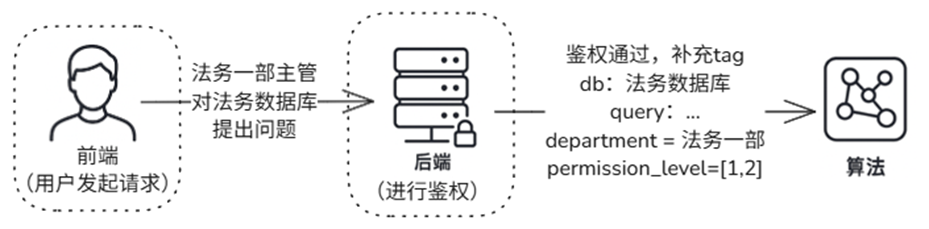

1.注册 权限等级- permission_level  字段：

In [ ]:
CUSTOM_DOC_FIELDS = {"department": DocField(data_type=DataType.VARCHAR, max_size=32, default_value=''), 
                     "permission_level": DocField(data_type=DataType.INT32, default_value=1)}

2.上传文档同时标记权限等级（如permission_level = 1）

In [ ]:
files = [('files', ('普通文档.pdf', io.BytesIO(...)),
          ('files', ('敏感文档.pdf', io.BytesIO(...))]
metadatas=[{"department": "法务一部", "permisssion_level": 1},
           {"department": "法务一部", "permisssion_level": 2}]))

3.检索时指定权限等级

In [ ]:
nodes = retriever(query, filters={'department': ['法务一部'], "permission_level": [1,2]} )

# 三、共享方式多样性以及解决方案

除了权限控制，企业在知识共享方面也面临多样化需求：一方面，不同团队间常需共享算法资源以提升复用效率；另一方面，多个部门之间也存在知识库交叉使用的需求，支持多对多的知识复用关系。这些场景对灵活的共享机制提出了更高要求。

## 1.共享灵活性：支持多源知识与算法自由适配

在企业中，多个部门可能共享相同的算法进行数据处理、推理和决策，但由于各自的业务领域不同，**每个部门通常拥有独立的知识库**，存储各自领域的专属信息。因此，系统需要支持**同一算法可作用于多个不同的知识库**，确保算法在不同部门的适用性。

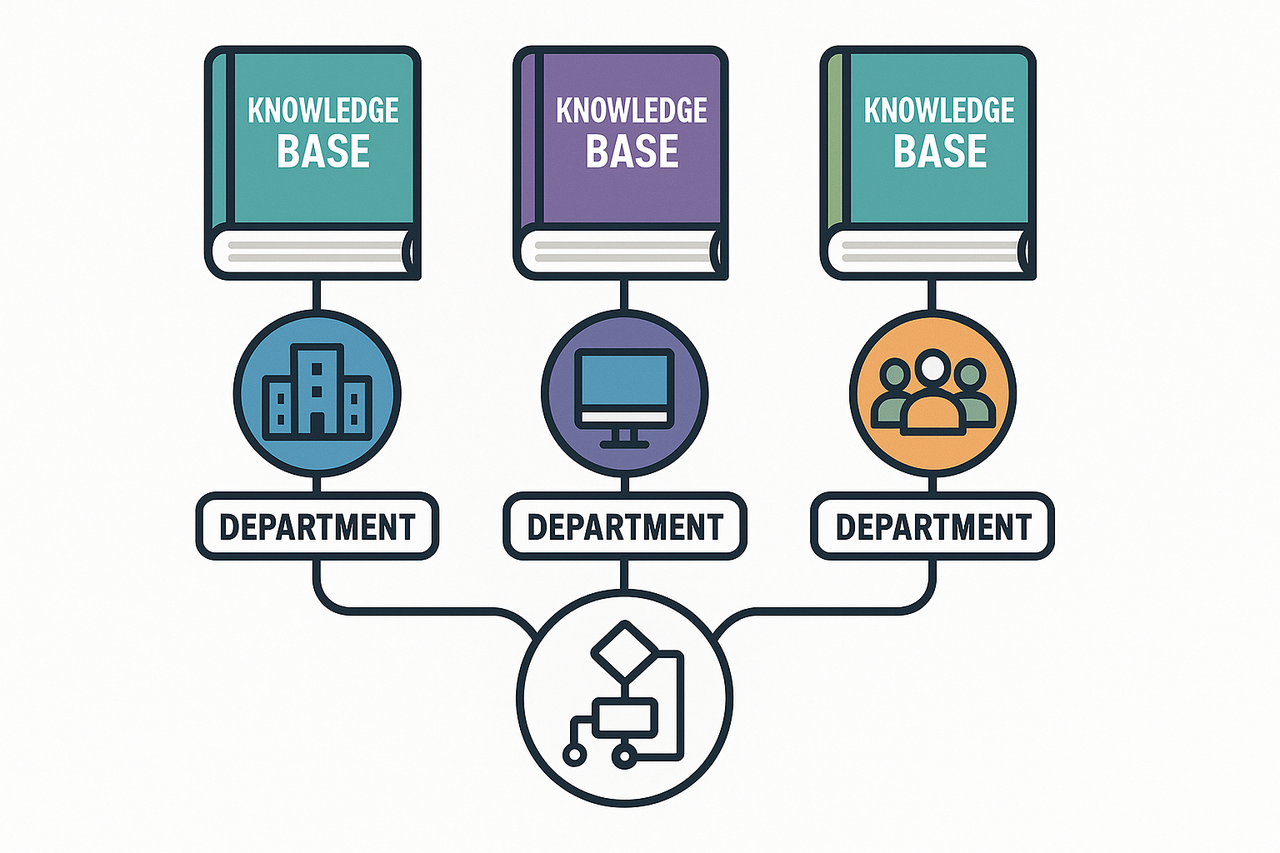

- **📈** 比如在一家金融公司中，风险控制部门和市场分析部门可能都使用相同的文本解析和嵌入算法来预处理数据，但风险控制部门的知识库主要包含历史交易和客户信用记录，而市场分析部门的知识库则包含市场动态和竞争对手情报。系统需要支持在不同的知识库中复用相同的数据处理算法。

另一方面，也有部分企业场景中，不同的部门可能使用各自定制的算法进行数据分析和决策，但**某些部门之间可能需要共享同一知识库**，以便在**统一的信息源基础上进行差异化计算**。系统需要支持**不同算法可作用于同一知识库**，以满足这种业务需求。

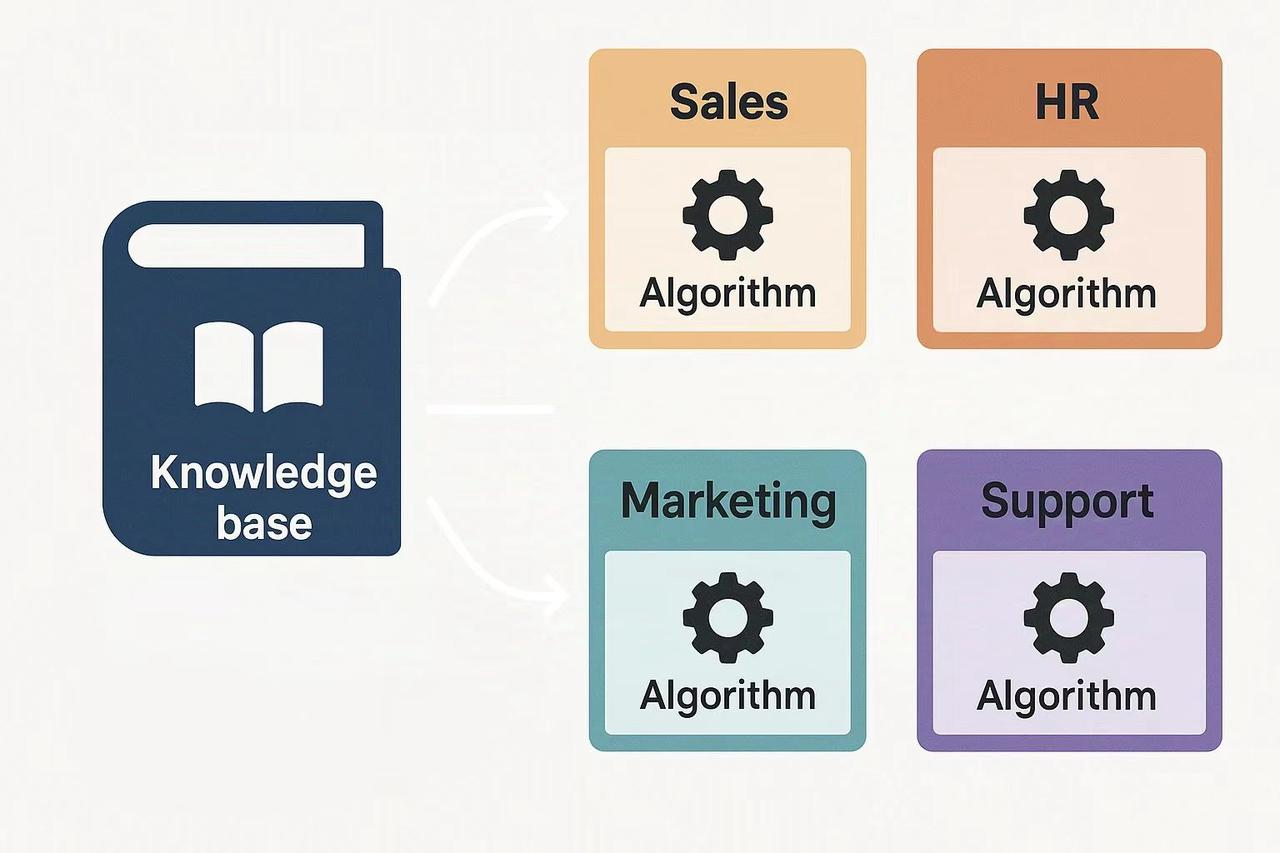

- ☕ 比如在一家电商企业中，推荐系统部门可能使用基于协同过滤的嵌入算法对用户行为进行建模，而搜索优化部门可能使用基于词向量的相似度排序算法来提升搜索结果的相关性。这两个部门可能都基于同一个用户行为数据集，系统需要支持在同一知识库中独立运行不同的嵌入和排序算法，生成针对性优化的结果。

接下来，我们将介绍如何利用 **lazyllm** 实现 RAG 流程中算法模块的共享与灵活配置。

**LazyLLM** 支持灵活的算法插件机制，为构建可插拔的智能系统提供了基础保障。我们可以预先定义一个 **全局算法注册器**，将常用的解析器、嵌入模型和相似度计算方法统一管理，从而在构建知识库和检索器（`Retriever`）时，实现算法的灵活组合与复用。

注：以下代码demo仅展示框架，实际算法需根据需求自行实现

In [ ]:
class AlgorithmRegistry:
    """全局算法注册器，实现算法与知识库的解耦复用"""
    
    # --------------------------
    # 文档解析算法池
    # --------------------------
    DOC_PARSERS = {
        "magic_pdf": MagicPDFReader(),  # 带OCR的高级PDF解析
        "basic_pdf": SimplePDFParser(),   # 轻量PDF解析
        "docx": OfficeParser(),           # 严格模式Word解析
        "html": BeautifulSoupParser()
    }
    
    # --------------------------
    # 节点解析算法池
    # --------------------------
    NODE_PARSERS = {
        "semantic_chunk": SemanticNodeSplitter(),  # 语义分块
        "graph_based": KnowledgeGraphParser()  # 金融实体识别
    }
    
    # --------------------------
    # 嵌入模型池
    # --------------------------
    EMBEDDINGS = {
        "general": SentenceTransformer(),    # 通用语义
        "finance": FinBERTEmbedding(),# 金融领域专用
        "bio": BioClinicalBERT.from_pretrained() 
    }
    
    # --------------------------
    # 相似度计算策略
    # --------------------------
    @staticmethod
    @fc_register(name="euclidean")                            
    def euclidean_sim(query, nodes):
        pass

    @staticmethod
    @fc_register(name="ifdif")                                 
    def ifdif_sim(query, node):
        pass

前文代码示例展示了如何构建一个“算法池”，企业可根据自身需求进行扩展和维护。完成注册后，系统可根据具体业务场景，按需选择合适的算法组件，实现“**算法即服务**”的设计理念。

以一个对准确性要求极高的 **金融风控场景** 为例：

- **嵌入模型** 选择了针对金融文本微调的 FinBERT，以获得更精确的语义编码；
- **文档解析器** 采用具备 OCR 能力的高精度 PDF 解析工具，保障合同等复杂文件的结构完整性；
- **节点解析** 采用语义切分策略，以保留关键信息的语义上下文，提升召回质量。

代码示例如下：

In [ ]:
# 金融风控（高精度导向）-- 处理复杂PDF合同，需识别法律实体与财务条款

law_kb = Document("path/to/kb", name='金融风控知识库', embed=AlgorithmRegistry.EMBEDDINGS['finance'])   # 选择金融领域BERT微调模型

law_kb.add_reader(AlgorithmRegistry.DOC_PARSERS['magic_pdf'])   # 选择处理复杂PDF合同，需识别精细法律实体与财务条款

law_kb.create_node_group(name='semantic_nodes', transform=AlgorithmRegistry.NODE_PARSERS['semantic_chunk'])  # 选择语义分块算法

# 定义 retriever 并选择 节点组 和 相似度计算方式
retriever = Retriever(
    group_name="semantic_nodes",   
    similarity="cosine",      
    topk=1                
)

**✅**  同一套算法在多个知识库中的应用场景已在前面权限的部分讨论过。

📌 接下来，我们实现在同一知识库中，通过不同文档分组实现算法多样化的场景。

In [ ]:
docs = Document(path, manager=True, embed=OnlineEmbeddingModule())
# 注册分组
Document(path, name='法务文档管理组', manager=docs.manager)
Document(path, name='产品文档管理组', manager=docs.manager)
#  模拟文档上传
docs.start()
files = [('files', ('产品文档.txt', io.BytesIO("这是关于产品的信息。该文档由产品部编写。\n来自产品文档管理组".encode("utf-8")), 'text/plain'))]
files = [('files', ('法务文档.txt', io.BytesIO("这是关于法律事务的说明。该文档由法务部整理。\n来自法务文档管理组".encode("utf-8")), 'text/plain'))]
…
# 为 产品文档管理组 设置切分方式为按 段落 切分
doc1 = Document(path, name=‘产品文档管理组', manager=docs.manager)
doc1.create_node_group(name="block", transform=lambda s: s.split("\n") if s else '')
retriever1 = Retriever([doc1], group_name="block", similarity="cosine", topk=3)

# 为 法务文档管理组 设置切分方式为按 句子 切分
doc2 = Document(path, name=‘法务文档管理组’, manager=docs.manager)
doc2.create_node_group(name=“line”, transform=lambda s: s.split(“。") if s else ‘’)
retriever2 = Retriever([doc2], group_name="line", similarity="cosine", topk=3)

## 2.召回解耦：支持知识库与召回服务灵活协同

为应对复杂的知识共享与复用需求，企业越来越需要灵活而高效的知识组织结构与管理能力：

**需要多对多的知识组织结构**  

- 企业往往希望通过一个统一的文档管理服务，集中管理多个知识库，既支持各业务部门对知识内容的独立维护，又保障在需要时的受控共享。  
- 同一知识库还能被多个 RAG 召回系统调用，实现跨业务系统的知识复用，提升模型服务的覆盖面与智能化能力。

**需要多业务场景的知识复用能力**  

- 面对客服、合规、风控、市场等多样化业务需求，企业必须确保知识能够高效复用，同时又能按场景独立更新、灵活适配。  

为满足上述需求，LazyLLM不仅提供灵活的文档管理模块，还将**文档管理与 RAG 召回服务进行完全解耦，**来满足企业知识管理和召回需求的多样性，这样做的好处具体体现在：

- **多对多管理模式**：一个文档管理服务可以同时管理**多个知识库**，支持不同业务部门的知识存储需求。
- **多 RAG 适配**：同一个**知识库**可以适用于**多个 RAG 召回服务**，一个 RAG 召回服务可以从多个**知识库**中检索数据。

得益于这种解耦设计，确保了企业能够在不同业务场景下，动态调整知识库和 RAG 召回服务的绑定关系，满足个性化的知识管理需求。

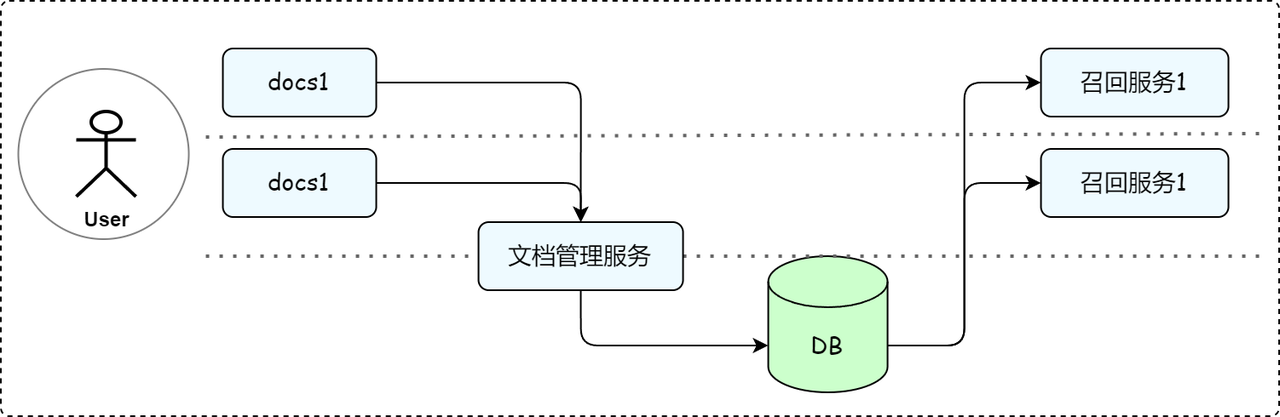

而具体实现起来，仅需以下两步骤，可搭建多知识库管理和召回流程。

1.**初始化知识库**

初始化知识库有两种方式：

- **路径定义方式**：如果已有整理好的知识库文档，可直接通过指定文件路径来定义知识库。
- **动态管理方式**：如果知识库需要动态调整，可通过启动知识库服务后，进行上传、删除和管理操作。

> 说明：通过启动服务来上传文档的方式仅能绑定一个路径，若存在多个不同路径的数据库，建议使用定义路径的方式；为不同知识库灵活地注册不同的算法，但需要保持node group的name一致，以便后续进行联合召回。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/multi_retriever.py#L7)

In [ ]:
from lazyllm.tools import Document
from lazyllm import OnlineEmbeddingModule
import time

# =============================
# 方法1.通过定义路径的方式
# =============================

law_data_path = "path/to/docs/law"
product_data_path = "path/to/docs/product"
support_data_path = "path/to/docs/support"

law_knowledge_base = Document(law_data_path, name='法务知识库'，embed=OnlineEmbeddingModule(source="glm", embed_model_name="embedding-2"))
product_knowledge_base = Document(product_data_path,name='产品知识库'，embed=OnlineEmbeddingModule(source="glm", embed_model_name="embedding-2"))
support_knowledge_base = Document(support_data_path,name='客户服务知识库'，embed=OnlineEmbeddingModule(source="glm", embed_model_name="embedding-2"))


# =============================
# 方法2.通过文档上传方式
# =============================

data_path = "path/to/docs"

law_knowledge_base = Document(data_path, name='法务知识库', manager="ui"，embed=OnlineEmbeddingModule(source="glm", embed_model_name="embedding-2"))
# 通过法务知识库的 manager 共享管理器
product_knowledge_base = Document(
    data_path,
    name='产品知识库',
    manager=law_knowledge_base.manager,
)

law_knowledge_base.start()
# ... 服务启动后手动增删文件 ... #

2.**启用 RAG 召回服务**

定义好知识库后，可根据需要为不同知识库灵活配置召回服务。将文档管理对象传入定义的 Retriever 即可，Retriever 的具体使用方法详见之前的教程[选修2:自定义召回策略相关组件]。企业可通过业务需求配置数据处理算法注册为node_group， 并在进行召回时使用。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/multi_retriever.py#L29)

In [ ]:
from lazyllm import Retriever, SentenceSplitter

# 配置和定义数据处理算法, 可根据业务需要自定义
Document.create_node_group(name="sentences", transform=SentenceSplitter, chunk_size=1024, chunk_overlap=100)

# 组合法务 + 产品知识库，处理与产品相关的法律问题
retriever_product = Retriever(
    [law_knowledge_base, product_knowledge_base],
    group_name="sentences",       # 分组名（根据业务需求选择）
    similarity="cosine",       # 相似度参数（根据模型配置）
    topk=2                # 召回前2个最相关的结果
)

product_question = "A产品功能参数和产品合规性声明"
product_res_nodes = retriever_product(product_question)

# 组合法务 + 客户知识库，处理客户支持相关问题
retriever_support = Retriever(
    [law_knowledge_base, support_knowledge_base],
    group_name="sentences",
    similarity="cosine",
    topk=2
)

support_question = "客户投诉的处理方式以及会导致的法律问题"
support_res_nodes = retriever_support(support_question)

...

检索结果示例如下，当检索问题“A产品功能参数和产品合规性声明”，可同时检索到产品知识库中的产品参数内容和法规知识库中的相关条款：

In [ ]:
print(f"query: {product_question }")
print("retrieve nodes:")
for node in product_res_nodes :
    print(node.text)
    print()
"""
query: A产品功能参数和产品合规性声明
retrieve nodes:
A智能管理系统的功能参数
3.1 系统性能
并发处理能力：支持高并发访问，满足企业级应用需求。
响应时间：在高负载条件下，保持低延迟响应。
数据吞吐量：支持大规模数据的快速读写和处理。
3.2 兼容性
操作系统支持：兼容Linux和Windows操作系统。
数据库兼容性：支持MySQL、PostgreSQL等主流数据库。
3.3 安全性
数据加密：支持静态数据和传输数据的加密。
访问控制：基于角色的权限管理，确保数据安全。

1. 产品合规性声明
公司在产品的设计、开发、生产和销售过程中，严格遵守以下法律法规：
《产品质量法》——确保产品符合国家质量标准，不存在虚假宣传。
《消费者权益保护法》——保障用户在使用产品过程中的合法权益。
《数据安全法》——严格保护用户个人信息，未经授权不得向第三方泄露。
2. 知识产权与法律责任
本公司产品中涉及的所有代码、算法和技术均受《著作权法》和《专利法》保护。
用户不得擅自修改、复制或分发公司产品中的任何组件。
如因产品缺陷导致用户损失，公司承担修复责任，但因用户使用不当或未遵守产品使用说明导致的损失，公司不承担责任。
3. 合同履行责任
公司在合同中明确约定产品功能、交付标准和服务期限。
若因公司原因未履行合同约定内容，用户有权根据合同条款要求公司承担违约责任。
若用户在产品中嵌入或调用外挂、脚本工具或未经授权的API，公司有权终止服务并保留追究法律责任的权利
"""

[相关视频：video\17_4.mp4](video/17_4.mp4)

通过灵活的知识库配置和可控的 RAG 召回服务，LazyLLM 能实现共享方式的多样性。


# 四、对话管理以及解决方案

在企业实际业务中，对话系统需要能记住用户之前的聊天内容，并根据历史对话更好地理解用户当前的需求。比如，客服机器人需要知道用户之前问过什么问题，避免重复回答；或者AI助手能结合之前的聊天内容，优化当前的问题，让回答更精准。

同时，系统要支持多用户同时使用，确保不同用户的对话互不干扰。比如，A用户在和机器人聊订单问题，B用户在咨询产品信息，系统要能区分他们的对话记录，不会混淆。此外，还要支持实时流式输出，让用户能像正常聊天一样逐步看到回复，而不是等待全部生成完才显示。

为了实现这些功能，lazyllm提供了一个统一的配置中心`globals`，管理不同用户的对话历史、上下文信息等，并在对话结束后自动清理不必要的数据，避免资源浪费。通过 `globals`，系统能够隔离不同会话的对话历史与上下文，避免数据干扰，同时集中保存用户对话参数、传入的文件路径以及对话过程中产生的中间结果，供后续处理环节使用。这种设计保证了跨服务之间的数据一致性与高效流转。

接下来介绍如果通过`globals` 实现历史对话管理和多用户并发的对话管理。

## 1.历史对话管理

​     首先我们通过结合 `globals` 配置中心，实现一个支持历史上下文、流式输出的对话流程。    `lazyllm.OnlineChatModule(stream=True)` 初始化一个支持流式输出的大语言模型，并使用 `ThreadPoolExecutor` 建立线程池，支持最多 50 路并发请求。每个请求在 `slots` 中分配一个空闲位置，确保同一时刻不会超过设定的最大连接数。

- 每次新会话启动时，`init_session_config` 会结合默认 few-shot 提示与用户自定义的历史对话，统一初始化到对应的 `session_id` 下的 `globals` 空间中，保证每个会话拥有独立的上下文。
- 为了安全地在多线程环境中管理模型推理过程，`respond_stream` 方法在提交推理任务时使用了 `contextvars` 拷贝当前上下文，避免不同会话间上下文变量串联。整个响应过程中，通过 `FileSystemQueue` 实现边生成边输出的流式效果，并在推理结束后，把最新的用户输入和助手回复追加进会话历史。

​    为了便捷地管理 session 生命周期，系统提供了 `with_session` 装饰器自动完成上下文切换，而 `handle_request` 函数作为统一入口，能够根据传入的 `session_id` 和历史记录，发起一轮新的流式对话。这种机制不仅实现了多用户隔离、历史记忆管理，还确保了高并发场景下的稳定性和一致性，为后续接入更多复杂交互提供了基础支撑。

[代码GitHub链接](https://github.com/FFFFFancy/Tutorial/blob/a09a84cdf0585a5c9d52af6db0e965be95d03123/rag/codes/chapter17/chat_with_history.py#L10)

In [ ]:
from lazyllm import globals


llm = lazyllm.OnlineChatModule(stream=True)
threadPool = ThreadPoolExecutor(max_workers=50)
slots = [0] * 50

# 公共 few shot 历史
DEFAULT_FEW_SHOTS = [
    {"role": "user", "content": "你是谁？"},
    {"role": "assistant", "content": "我是你的智能助手。"}
]

class ChatHistory(BaseModel):
    user: str
    assistant: str

class ChatRequest(BaseModel):
    user_input: str
    history: Optional[List[ChatHistory]] = None

def allocate_slot():
    for idx, val in enumerate(slots):
        if val == 0:
            slots[idx] = 1
            return idx
    return -1

def release_slot(session_id):
    if 0 <= session_id < len(slots):
        slots[session_id] = 0
        globals.pop(session_id)

def init_session_config(session_id, user_history=None):
    globals._init_sid(session_id)

    if user_history is not None:
        history = []
        # 合并 few-shot + 用户历史
        history.extend(DEFAULT_FEW_SHOTS)
        for h in user_history:
            history.append({"role": "user", "content": h.user})
            history.append({"role": "assistant", "content": h.assistant})
        globals["global_parameters"]["history"] = history
    else:
        if "history" not in globals["global_parameters"]:
            globals["global_parameters"]["history"] = copy.deepcopy(DEFAULT_FEW_SHOTS)

def with_session(func):
    def wrapper(session_id, *args, **kwargs):
        globals._init_sid(session_id)
        return func(session_id, *args, **kwargs)
    return wrapper

class SessionResponder:
    def __init__(self):
        pass

    def respond_stream(self, session_id, model_in, user_history=None):
        init_session_config(session_id, user_history)

        print("[Respond Stream] Current SID:", globals._sid)
        history = globals["global_parameters"]["history"]
        print("history", history)

        ctx = contextvars.copy_context()
        func_future = threadPool.submit(lambda: ctx.run(llm, model_in, llm_chat_history=history))

        response = ''

        while True:
            assert session_id == globals._sid, f"\nSession ID mismatch: expected {session_id}, got {globals._sid}"

            if message := FileSystemQueue().dequeue():
                msg = "".join(message)
                response += msg
                yield msg
            elif func_future.done():
                break

        model_out = func_future.result()

        assert session_id == globals._sid, f"Session ID mismatch after LLM: expected {session_id}, got {globals._sid}"

        # 更新历史
        globals["global_parameters"]["history"].append({
            "role": "user",
            "content": model_in
        })
        globals["global_parameters"]["history"].append({
            "role": "assistant",
            "content": model_out
        })

        return model_out

@with_session
def handle_request(session_id: str, user_input: str, user_history: Optional[List[ChatHistory]] = None):
    chat = SessionResponder()
    for chunk in chat.respond_stream(session_id, model_in=user_input, user_history=user_history):
        print(chunk, end='', flush=True)

整体来看，这段代码依托 `globals` 可实现：

- 灵活加载和隔离管理不同用户的历史对话；
- 支持系统内部预置 few-shot 示例，引导模型更好地理解任务；
- 在结合历史上下文的基础上，总结、改写并生成新的对话内容或问题。

让我们来看一下执行效果：

```bash
###################################
# 使用历史对话
###################################
history = [
    ChatHistory(
        user="香蕉的英文是什么？",
        assistant="香蕉的英文是banana"
    ),
    ChatHistory(
        user="那苹果呢？",
        assistant="苹果的英文是apple"
    )
]
user_input = "那橘子呢？"

response = ""
for chunk in respond_stream(session_id, user_input, history):
    response += chunk
# >>> 橘子的英文是orange。

#####################################
# 内部预置 few-shot 示例
#####################################
DEFAULT_FEW_SHOTS = [
    {"user": "请帮我改写：'这个报告写得还可以。'", 
     "assistant": "这份报告整体表现良好，但仍有提升空间。"},
    {"user": "请帮我优化：'我们的销售业绩不错。'", 
     "assistant": "我们的销售业绩表现出色，达到了预期目标。"},
]

user_input = "请帮我改写：'客户反馈我们服务态度很好。'"
# >>> 客户对我们服务态度给予了积极评价。


#####################################
# 总结历史示例
#####################################
history = [
    ChatHistory(
        user="机器学习是什么？",
        assistant="机器学习是一门开发算法和统计模型的科学，计算机系统使用这些算法和模型，在没有明确指令的情况下，依靠既有模式和推理来执行任务"
    ),
    ChatHistory(
        user="机器学习的应用场景？",
        assistant="机器学习被广泛应用于推荐系统中，如电商网站的商品推荐、社交媒体的内容推荐等。通过分析用户的历史行为和偏好，机器学习算法可以预测用户可能感兴趣的内容，并提供个性化的推荐。自然语言处理：自然语言处理是机器学习的另一个重要应用领域，包括语音识别、机器翻译、情感分析、垃圾邮件过滤等。机器学习算法可以帮助计算机理解和生成人类语言，实现人机交互的智能化。图像识别和处理：机器学习在图像识别和处理方面也发挥着重要作用，如人脸识别、车牌识别、图像检索、物体识别等。通过训练大量的图像数据，机器学习算法可以学习并识别出图像中的特征，从而实现对图像的智能处理。"
    )
]
user_input = "总结下这段对话"

# >>> 这段对话主要围绕机器学习展开，首先解释了机器学习的定义，即通过算法和统计模型，让计算机系统在没有明确指令的情况下，基于既有模式和推理完成任务。接着讨论了机器学习的应用场景，包括推荐系统（如电商和社交媒体个性化推荐）、自然语言处理（如语音识别、机器翻译、情感分析等）以及图像识别和处理（如人脸识别、物体识别等）。最后总结了机器学习在智能化任务中的重要作用。

- 第一次请求只输入 “橘子”，系统按历史上下文正常生成与橘子相关的回答“orange”。
- 第三次请求输入 "总结这段对话"，系统基于完整历史成功输出对话总结。
- 并且预先指定的对话也在ChatHistory中。

[相关视频：video\17_5.mp4](video/17_5.mp4)

## 2.多用户并发对话管理

​      同样基于上述设计，以下代码进一步完善了基于 `globals` 的**多用户会话管理与历史对话追踪**机制。系统初始化了一个流式推理模块 `lazyllm.OnlineChatModule(stream=True)`，并通过 `ThreadPoolExecutor` 支持最多 50 个并发请求，同时通过 `slots` 数组管理连接资源，保证不同用户会话互不干扰。

- 每当新的请求到来时，`init_session_config` 方法根据传入的用户历史，初始化对应 `session_id` 下的上下文环境，若无历史则默认分配一个空白对话历史，确保每条会话轨迹独立。为了简化多次会话调用的上下文切换，`with_session` 装饰器自动在执行函数前绑定正确的 `session_id`。
- 实际推理时，`SessionResponder` 类负责发起流式对话，内部使用 `contextvars` 捕获当前上下文，保证即使在线程池中执行推理任务，也能维持正确的会话隔离。系统通过 `FileSystemQueue` 实现流式输出，在推理过程中实时返回生成的内容，推理完成后，再将本轮对话完整地追加到历史记录中，以便后续连续对话使用。

​     最后，通过外部示例展示了如何用 `handle_request` 函数发起多轮对话，系统能够正确地维护多个用户之间独立且连续的对话流，保证不同用户的历史上下文不会混淆，为支持高并发、强上下文连贯性的应用场景打下了良好的基础。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/a09a84cdf0585a5c9d52af6db0e965be95d03123/rag/codes/chapter17/chat_with_multi_user.py#L11)

In [ ]:
llm = lazyllm.OnlineChatModule(stream=True)
threadPool = ThreadPoolExecutor(max_workers=50)
slots = [0] * 50

DEFAULT_FEW_SHOTS = []

class ChatHistory(BaseModel):
    user: str
    assistant: str

class ChatRequest(BaseModel):
    user_input: str
    history: Optional[List[ChatHistory]] = None

def allocate_slot():
    for idx, val in enumerate(slots):
        if val == 0:
            slots[idx] = 1
            return idx
    return -1

def release_slot(session_id):
    if 0 <= session_id < len(slots):
        slots[session_id] = 0
        globals.pop(session_id)
    
llm = lazyllm.OnlineChatModule(stream=True)

def init_session_config(session_id, user_history=None):
    globals._init_sid(session_id)
    # if globals._sid not in globals._Globals__data:
    #     globals._Globals__data[globals._sid] = copy.deepcopy(globals.__global_attrs__)

    if user_history is not None:
        globals["global_parameters"]["history"] = user_history
    else:
        if "history" not in globals["global_parameters"]:
            globals["global_parameters"]["history"] = []

def with_session(func):
    """自动绑定 session_id 的装饰器"""
    def wrapper(session_id, *args, **kwargs):
        globals._init_sid(session_id)
        return func(session_id, *args, **kwargs)
    return wrapper

class SessionResponder:
    def __init__(self):
        pass

    def respond_stream(self, session_id, model_in, user_history=None):
        init_session_config(session_id, user_history)

        print("[Respond Stream] Current SID:", globals._sid)
        history = globals["global_parameters"]["history"]
        print("history", history)

        # 捕获当前上下文（确保线程池提交的任务也带上下文）
        ctx = contextvars.copy_context()
        func_future = threadPool.submit(lambda: ctx.run(llm, model_in, llm_chat_history=history))

        response = ''

        while True:
            assert session_id == globals._sid, f"\nSession ID mismatch: expected {session_id}, got {globals._sid}"

            if message := FileSystemQueue().dequeue():
                msg = "".join(message)
                response += msg
                yield msg
            elif func_future.done():
                break

        model_out = func_future.result()

        assert session_id == globals._sid, f"Session ID mismatch after LLM: expected {session_id}, got {globals._sid}"

        # globals["global_parameters"]["history"].append(model_out)
        globals["global_parameters"]["history"].append({
            "role": "user",
            "content": model_in
        })
        globals["global_parameters"]["history"].append({
            "role": "assistant",
            "content": model_out
        })

        return model_out

# 外部使用示例
@with_session
def handle_request(session_id: str, user_input: str):
    chat = SessionResponder()
    for chunk in chat.respond_stream(session_id, model_in=user_input):
        print(chunk, end='', flush=True)

if __name__ == "__main__":
    
    handle_request("user321", "苹果的英文是什么！")
    print("\n\n")
    handle_request("user123", "机器学习是什么")
    print("\n\n")
    handle_request("user321", "香蕉呢")
    print("\n\n")
    handle_request("user123", "它有什么用？")

效果示例：

- 用户 `id1` 问“苹果的英文”，再问“香蕉”时，模型能记住当前会话是翻译任务。
- 用户 `id2` 问“机器学习是什么？”后，追问“它有什么作用？”时，模型能关联上下文解释应用场景。

二者维度独立的历史对话内容，相互不影响。

[相关视频：video\17_6.mp4](video/17_6.mp4)

> ❗注意，实现上述功能需要用redis数据库实现文件系统输出管理，设置方法为：
>
> export LAZYLLM_DEFAULT_FSQUEUE=SQLITE
>
> export LAZYLLM_FSQREDIS_URL=redis://[user name]:[password]@[host]/[port]

# 五、安全需求以及解决方案

最后，企业在构建知识库的过程中，不仅要保障内部的信息安全，还需关注面向公众时的外部安全，防止数据泄露、信息滥用以及潜在的合规风险。

## 1.企业安全

在企业知识库建设中，安全始终是首要考虑因素。尤其是当知识库中包含公司政策、财务报表、客户合同等高度敏感或私有数据时，任何信息泄露都可能带来严重的法律责任和商业损失。为此，系统需具备完善的保护机制。

**（1）加密**

- **私有数据保护**：通过数据隔离机制，确保不同业务或部门间的数据隔离，防止数据泄露。
- **知识加密**：对文档在存储与传输过程中的全链路加密，确保数据机密性与完整性。
- **模型加密**：支持模型调用过程中的数据加密，避免敏感信息泄露。

**（2）私有化部署**

- **本地化模型推理引擎**：核心组件部署于内网环境，保障数据安全。
- **数据本地处理**：确保知识数据在企业内部完成，避免外泄。
- **强化权限控制**：结合网络隔离和多因子认证，实现安全访问。

**（3）信创**

为保障核心技术自主可控，系统全面兼容国家信创名录中的软硬件产品

- **国产CPU**：鲲鹏、龙芯等，提供高性能计算支持。

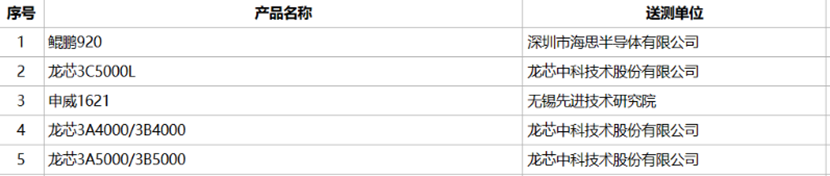

- **国产操作系统**：麒麟、统信UOS等，确保系统底层安全。

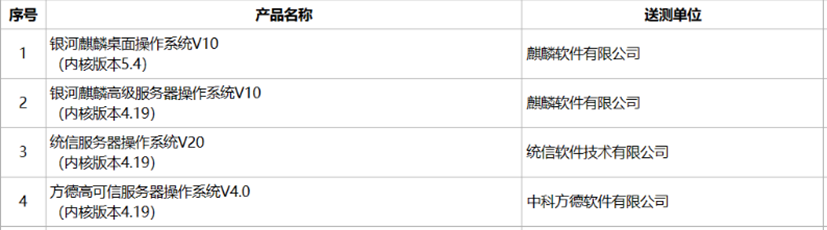

- **国产数据库**：达梦、人大金仓等，敏感数据存得更放心。

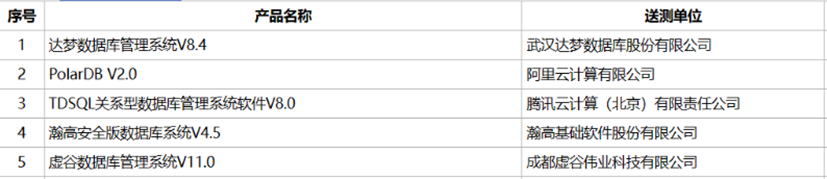

- **全链路合规**：从芯片（如鲲鹏/飞腾）到软件均符合信创标准，通过国家信息安全认证。

## 2.公共安全

在企业级RAG系统中，公共安全不仅关乎企业自身的声誉与合规风险，更关联到模型输出对社会舆论、信息安全乃至国家安全的影响。系统应具备以下能力，确保模型生成内容不突破公共安全底线：

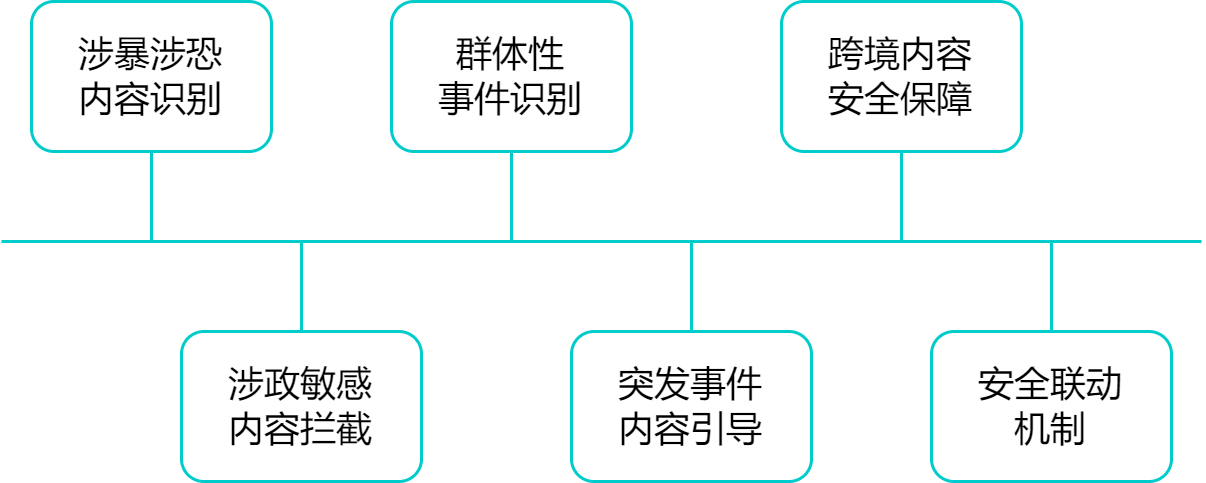

- 涉暴涉恐内容识别：自动检测与暴力、恐怖主义、极端言论相关的内容，防止模型成为非法信息的传播通道。
- 涉政敏感内容拦截：对分裂言论、非法组织宣传、造谣煽动等进行精准识别与阻断，避免引发政治敏感风险。
- 群体性事件识别：识别模型输出中可能煽动公众聚集、对抗或恐慌的内容，防范舆情发酵升级。
- 突发事件内容引导：在重大灾害、公共卫生或社会事件发生时，提供经过验证的信息输出机制，减少虚假内容传播风险。
- 跨境内容安全保障：在涉外输出场景中，支持配置涉敏国家/地区、组织和外交事件的识别策略，确保对外表态合法合规。
- 安全联动机制：支持与企业安全系统、监管平台或应急响应机制打通，实现内容风险的实时发现与快速响应。

通过公共安全模块的建设，企业可有效防控大模型在生成内容过程中可能引发的社会层面风险，提升企业数字治理能力，践行平台责任。

**如何维护公共安全 ？**

在知识库管理和检索过程中，可能涉及一些敏感信息或违规内容，如个人隐私、法律合规性条款等。因此，系统需要具备**全面的过滤机制**，在数据上传、存储和检索阶段，自动识别和屏蔽敏感词汇，防止敏感信息的误用或泄露。LazyLLM支持灵活的自定义规则配置，管理员可以根据企业实际需求，动态维护敏感词列表，结合分词、正则表达、DFA（Deterministic Finite Automaton）等算法实现精准过滤。接下来我们来看如何将敏感词过滤的典型算法——DFA算法，接入lazyllm实现敏感词过滤。

**第一步**， 用定义lazyllm模块的方式实现DFA算法的定义 ，将其包装为可接入lazyllm的组件，详见[选修2:自定义召回策略相关组件] - 基于 class 的自定义 Transform 算法。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/retriever_with_DFA.py#L10)

In [ ]:
from lazyllm.tools.rag import DocNode, NodeTransform
from typing import List
   
# 定义DFA算法
class DFAFilter:
    def __init__(self, sensitive_words):
        self.root = {}
        self.end_flag = "is_end"
        for word in sensitive_words:
            self.add_word(word)

    def add_word(self, word):
        node = self.root
        for char in word:
            if char not in node:
                node[char] = {}
            node = node[char]
        node[self.end_flag] = True

    def filter(self, text, replace_char="*"):
        result = []
        start = 0
        length = len(text)

        while start < length:
            node = self.root
            i = start
            while i < length and text[i] in node:
                node = node[text[i]]
                if self.end_flag in node:
                    # 匹配到敏感词，替换为指定字符
                    result.append(replace_char * (i - start + 1))
                    start = i + 1
                    break
                i += 1
            else:
                # 未匹配到敏感词，保留原字符
                result.append(text[start])
                start += 1

        return ''.join(result)
   
   
# 注册为transform
class DFATranform(NodeTransform):
    def __init__(self, sensitive_words: List[str]):
        super(__class__, self).__init__(num_workers=num_workers)
        self.dfafilter = DFAFilter(sensitive_words)

    def transform(self, node: DocNode, **kwargs) -> List[str]:
        return self.dfafilter.filter(node.get_text())

    def split_text(self, text: str) -> List[str]:
        if text == '':
            return ['']
        paragraphs = text.split(self.splitter)
        return [para for para in paragraphs]

**第二步**，将定义的DFAFilter 注册为文档服务的node group。同样使用上小节中"A产品功能参数和产品合规性声明"的检索问题，假设屏蔽【合同】这个词，只需DFAFilter注册为新的节点，并通过parent="sentences"继承上一步的处理方式。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/retriever_with_DFA.py#L65)

In [ ]:
from lazyllm import Retriever，SentenceSplitter
# 定义业务敏感词
sensitive_words = ['合同']
# 将敏感词过滤算法嵌入到业务逻辑中
Document.create_node_group(name="sentences", transform=SentenceSplitter, chunk_size=128, chunk_overlap=10)
Document.create_node_group(name="dfa_filter", parent="sentences"，transform=DFATranform(sensitive_words))

# 组合法务 + 产品知识库，处理与产品相关的法律问题
retriever_product = Retriever(
    [law_knowledge_base, product_knowledge_base],
    group_name="dfa_filter",       # 指定 dfa_filter
    similarity="cosine",       
    topk=2                
)

product_question = "A产品功能参数和产品合规性声明"
product_res_nodes = retriever_product(product_question)

可以看到，输出结果已将“敏感词”和“合同”替换为星号。在企业应用场景中，可以根据业务需求自定义敏感词库，以增强数据安全性。

屏蔽前：

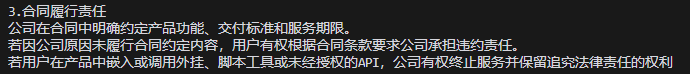

屏蔽后：

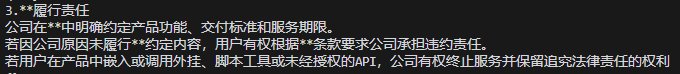

[相关视频：video\17_7.mp4](video/17_7.mp4)

**全流程敏感词过滤** 在实际应用中，除了原文档内容进行敏感词过滤外，我们还需对用户输入和大模型输出进行同样的处理。

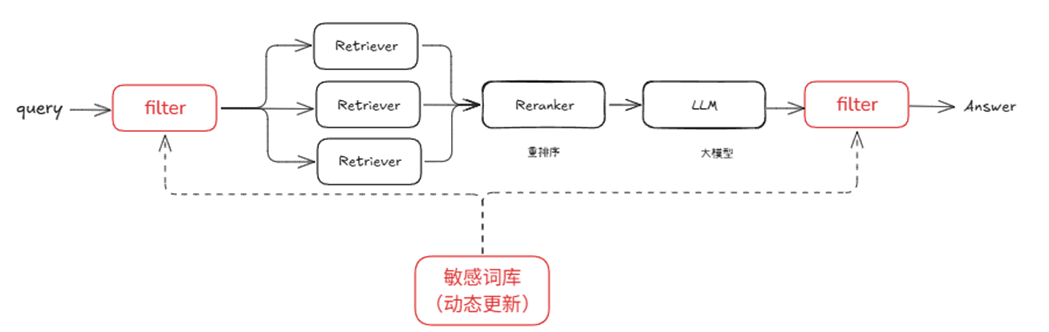

In [ ]:
with pipeline() as ppl:
    ppl.query_filter = lambda x: DFAFilter(sensitive_words).filter(x)
    ppl.retriever = Retriever(...)
    ppl.reranker = ...
    ppl.llm = ...
    ppl.output_filter = lambda x: DFAFilter(sensitive_words).filter(x)
   

针对企业级需求，lazyllm提供了灵活的文档管理和召回服务。通过配置不同的算法和知识库，系统能够在不同业务场景下满足**跨部门的数据处理和精准召回需求**。借助数据库管理功能，系统实现了**数据隔离**和**权限控制**，有效保障私有数据的安全性。同时，系统支持**标签检索**和敏感词过滤，进一步提升检索的精准度和合规性，帮助企业在复杂的数据环境中高效管理和利用知识库。

# 六、企业级RAG的总体实现思路

在前文中，我们从权限控制、共享方式、安全保障等多个维度详细解析了企业级RAG系统在真实落地过程中面临的核心需求与挑战。接下来，我们将整合上述要素，提出一个功能完善、可落地的企业级RAG搭建思路。

## 1.架构图

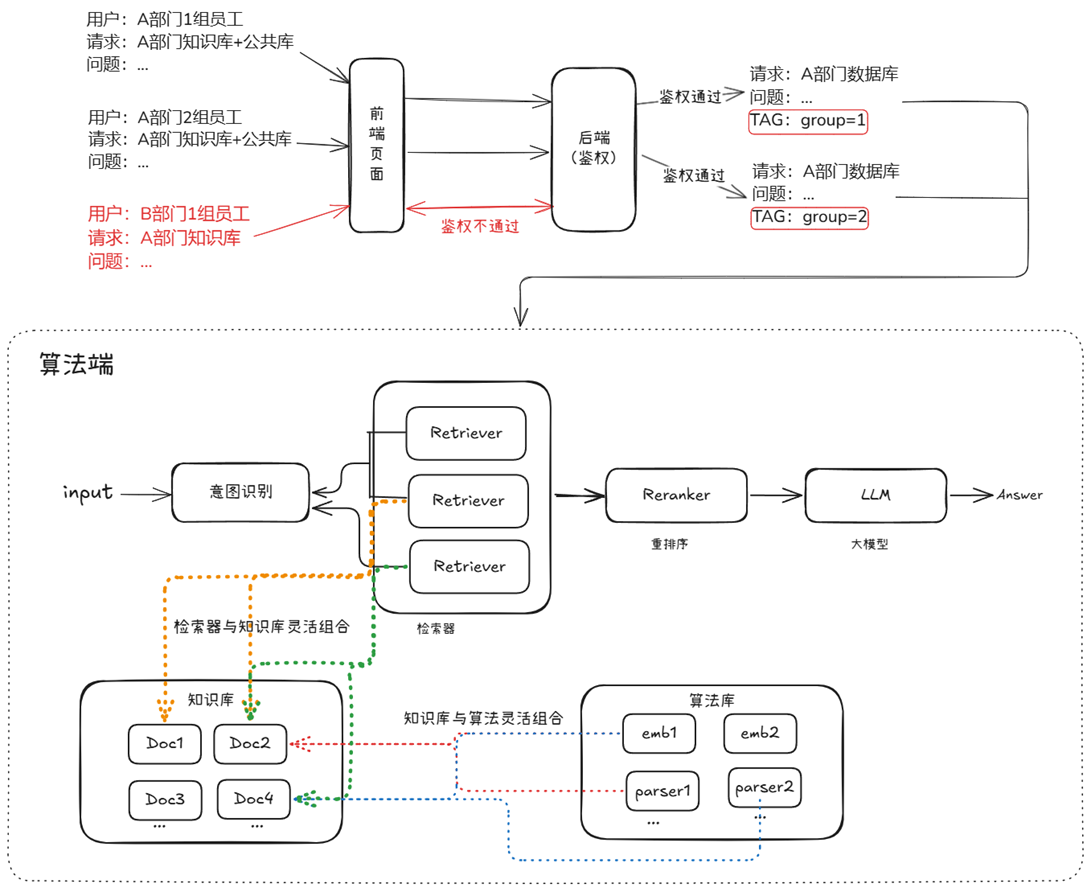

​    该企业级RAG系统主要由用户接入、意图识别、检索器、知识库、算法库、重排序器以及大模型模块组成。用户通过接入模块提交查询，请求首先经过意图识别模块，判断查询意图并动态决定后续检索策略。检索器模块由多个Retriever组成，能够灵活调用不同的知识库和算法库，完成多策略、多数据源的检索任务。知识库用于存储各类结构化或非结构化文档，算法库则包含多种向量化工具和解析器，支持知识数据的编码和处理，二者均可按需灵活组合。检索完成后，候选结果经过重排序模块优化相关性，再由大语言模型（LLM）基于优化后的内容进行生成，最终输出符合用户需求的答案。整个系统设计强调模块解耦、策略灵活和生成增强，适配多用户、高并发和多场景的企业应用需求。

## 2.代码实现

接下来，以一个电商场景为例，我们将构建一个具备上述功能的 RAG 问答系统。本次示例中共使用三个知识库，数据准备如图所示，数据库的构建方法已在第二章中详细介绍，此处不再赘述。

 
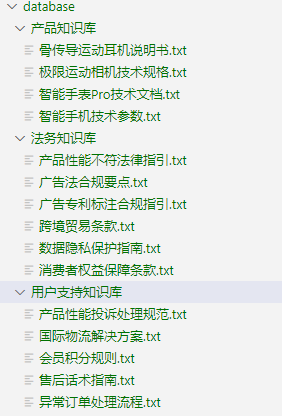

我们将产品知识库与法务知识库联合检索，用于处理产品及法务相关问题；同时将法务知识库与用户支持知识库组合，以应对用户支持类问题。为此，首先构建两条独立的 RAG pipeline。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/ecommerce_rag.py#L180)

In [ ]:
with pipeline() as product_law_ppl:
    product_law_ppl.retriever = retriever = Retriever(
            [doc_law, doc_product],
            group_name="dfa_filter",   
            topk=5, 
            embed_keys=['dense'],
        )
    product_law_ppl.reranker = Reranker(name="ModuleReranker",
                            model=OnlineEmbeddingModule(type='rerank'),
                            topk=2, output_format="content", join=True) | bind(query=product_law_ppl.input)
    product_law_ppl.formatter = (lambda nodes, query: dict(context_str=nodes, query=query)) | bind(query=product_law_ppl.input)
    product_law_ppl.llm = OnlineChatModule().prompt(lazyllm.ChatPrompter(prompt, extra_keys=["context_str"]))

with pipeline() as support_law_ppl:
    support_law_ppl.retriever = retriever = Retriever(
            [doc_law, doc_support],
            group_name="dfa_filter",   
            topk=5, 
            embed_keys=['dense'],
        )
    support_law_ppl.reranker = Reranker(name="ModuleReranker",
                            model=OnlineEmbeddingModule(type='rerank'),
                            topk=2, output_format="content", join=True) | bind(query=support_law_ppl.input)
    support_law_ppl.formatter = (lambda nodes, query: dict(context_str=nodes, query=query)) | bind(query=support_law_ppl.input)
    support_law_ppl.llm = OnlineChatModule().prompt(lazyllm.ChatPrompter(prompt, extra_keys=["context_str"]))

为用户提供统一的问答入口，并实现不同知识库间的无缝切换，我们引入了用户意图识别模块，能够根据查询内容自动选择合适的 RAG pipeline 进行处理。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/ecommerce_rag.py#L195)

In [ ]:
def build_ecommerce_assistant():
    llm = OnlineChatModule(source='qwen', stream=False)
    intent_list = [
        "产品法务问题",
        "用户支持问题",
    ]

    with pipeline() as ppl:
        ppl.classifier = IntentClassifier(llm, intent_list=intent_list)
        with lazyllm.switch(judge_on_full_input=False).bind(_0, ppl.input) as ppl.sw:
            ppl.sw.case[intent_list[0], product_law_ppl]
            ppl.sw.case[intent_list[1], support_law_ppl]
    return ppl

为了实现多用户并发会话请求并维护独立的上下文，我们通过 `globals` 管理器封装了 `EcommerceAssistant`，确保用户问答的隔离性。

[代码GitHub链接](https://github.com/LazyAGI/Tutorial/blob/7abc91dbb82a007a78731845dd8c360ac0cc1e75/rag/codes/chapter17/ecommerce_rag.py#L223)

In [ ]:
def init_session(session_id, user_history: Optional[List[ChatHistory]] = None):
    globals._init_sid(session_id)

    if "global_parameters" not in globals or "history" not in globals["global_parameters"]:
        globals["global_parameters"]["history"] = []

    if not globals["global_parameters"]["history"]:
        # 初始化为 default few-shot
        globals["global_parameters"]["history"].extend(DEFAULT_FEW_SHOTS)

    if user_history:
        for h in user_history:
            globals["global_parameters"]["history"].append({"role": "user", "content": h.user})
            globals["global_parameters"]["history"].append({"role": "assistant", "content": h.assistant})

def build_full_query(user_input: str):
    """根据 globals 里的历史，生成带历史的 full query文本"""
    history = globals["global_parameters"]["history"]
    history_text = ""
    for turn in history:
        role = "用户" if turn["role"] == "user" else "助手"
        history_text += f"{role}: {turn['content']}\n"

    full_query = f"{history_text}用户: {user_input}\n助手:"
    return full_query

class EcommerceAssistant:
    def __init__(self):
        self.main_pipeline = build_ecommerce_assistant()

    def __call__(self, session_id: str, user_input: str, user_history: Optional[List[ChatHistory]] = None):
        init_session(session_id, user_history)

        full_query = build_full_query(user_input)

        # 把带历史的 query 输入主 pipeline
        response = self.main_pipeline(full_query)

        # 更新历史到 globals
        globals["global_parameters"]["history"].append({"role": "user", "content": user_input})
        globals["global_parameters"]["history"].append({"role": "assistant", "content": response})

        return response

现在运行整个代码，查看效果。

[相关视频：video\17_8_rag.mp4](video/17_8_rag.mp4)

## 3.结果分析

运行日志：

```bash
==================== user1：用户支持问题 ====================
用户 user1 提问：
「用户投诉某智能手表的续航没有达到宣传效果，该怎么处理」

助手回复：
当用户投诉智能手表续航未达到宣传效果时，我们需要按照三级响应机制进行处理：

1. **技术验证**：请用户提供设备序列号及续航测试视频（需显示完整充放电周期）。我们内部将通过工具[PERF_CHECK_V3]对比宣传参数。

2. **法律评估**：触发法务系统自动生成《参数差异分析报告》，参考案例FC-2024-021进行详细对比。

3. **解决方案**：
   - 如果差异≤15%：我们将赠送用户1年延保（服务代码SV-228）。
   - 如果差异＞15%：根据《消费者权益保护法》第23条，我们将提供换新或差价三倍赔偿。

沟通话术："我们高度重视产品参数的准确性，将委托第三方机构（如SGS）进行复测，并在3个工作日内给您正式答复。"

依据《消费者权益保护法》第23条，商品实际性能与宣传参数差异超过行业标准允许误差范围（电子设备续航误差±15%）即构成虚假宣传。参考案例FC-2024-021：某品牌因智能手表续航虚标28%被判定三倍赔偿，并受到市场监督管理局50万元行政处罚。

建议技术部门建立续航测试标准流程（需符合GB/T 35143-2023标准），所有宣传数据必须附带测试环境说明（如：实验室环境25℃下连续使用）。

============================================================

====================user2：产品法务问题（带历史对话） ====================
用户 user2 的对话历史：
1. 用户: 「你好」
   助手: 「你好呀！」
2. 用户: 「我想咨询耳机宣传内容是否合规」
   助手: 「当然，请详细描述你的宣传文案。」

用户 user2 新提问：
「骨传导耳机不展示专利号」

助手回复：
根据提供的信息，如果骨传导耳机的宣传中涉及已申请或已授权的专利技术（如骨传导振子技术），但未明确标注专利号和专利类型（发明、实用新型或外观设计），这可能违反《广告法》第十二条以及相关实施细则的要求。

以下是具体分析：

1. **专利号标注问题**  
   - 根据法律规定，在广告宣传中提及专利技术时，必须完整标注专利号及专利类型。例如：“本产品采用骨传导振子技术，专利号：ZL2024XXXXXXX，实用新型专利。”
   - 如果仅提到“已申请专利”而未标明具体专利号，则属于不合规行为。参考AD-2024-017号处罚案例，某科技公司因未标注专利号被罚款87.6万元。

2. **跨境广告要求**  
   - 若该耳机宣传涉及跨境市场（如出口到其他国家），还需同步标注专利授权国家代码（如CN/EP/US）。例如：“专利号：ZL2024XXXXXXX，CN实用新型专利。”

3. **技术独占性声明合规性**  
   - 宣传文案需遵循“三不原则”：
     - 不暗示技术垄断（避免使用“唯一”“独家”等绝对化用语）。
     - 不扩大保护范围（确保与专利权利要求书严格对应）。
     - 不隐瞒专利状态变更（如专利被宣告无效，需在3个工作日内更新宣传物料）。

### 建议
- **立即补充专利信息**：在宣传中明确标注专利号及类型。如果专利正在申请中，应注明“专利申请中”而非直接宣称“已申请专利”。
- **避免绝对化用语**：不要使用“全球领先”“唯一”等表述，以免引发虚假宣传风险。
- **定期检查专利状态**：确保宣传内容与实际专利状态一致，及时更新。

如果你无法提供具体的专利号或专利类型，建议先调整宣传文案，避免因违规而遭受处罚。例如，可以改为描述功能性特点，如“采用先进的骨传导技术，实现IPX7级防水性能”。

============================================================

====================user1 ：用户支持问题跟进 ====================
用户 user1 继续提问：
「这种投诉处理方式有什么风险吗？」

助手回复：
这种处理方式虽然遵循了法律法规和行业标准，但仍可能存在以下潜在风险：

1. **用户信任受损**：如果用户的设备续航差异较大但未超过15%，仅提供延保服务可能无法完全修复用户体验，进而影响品牌忠诚度。

2. **测试环境争议**：宣传数据通常基于实验室条件（如25℃下连续使用），而实际使用场景复杂多变（高温、低温、高负载等）。若用户对测试环境说明不了解或不认可，可能引发进一步投诉。

3. **法务风险扩大**：如果部分产品续航虚标超过15%，且涉及较大用户群体，可能会被认定为系统性虚假宣传，从而面临集体诉讼或更严重的行政处罚。

4. **技术验证效率问题**：通过工具[PERF_CHECK_V3]进行对比需要一定时间，若响应速度过慢，可能导致用户不满升级为舆情事件。

### 风险规避建议：
- **主动优化宣传策略**：在产品页面及包装中明确标注续航测试环境（如“实验室环境下25℃连续使用”），并补充说明实际使用可能存在的差异。
- **建立快速响应机制**：针对续航类投诉，设立专项客服团队，确保在48小时内完成初步评估并向用户提供解决方案。
- **加强内部流程管控**：技术部门需定期更新续航测试标准流程，确保符合GB/T 35143-2023要求，并将测试结果与市场宣传同步校准。
- **提供额外补偿措施**：对于续航差异接近临界值的用户，可考虑赠送配件（如充电器）或延长保修期，以提升用户满意度。

最终目标是通过透明化沟通和积极应对，将潜在风险降至最低，同时维护品牌形象和用户信任。

根据以上日志，我们实现了：

1.自动意图识别

RAG系统通过**意图识别**功能，能够自动分析用户的提问并选择合适的处理流程（Pipeline）。例如，当收到用户支持性问题时，其结合了用户支持库的“三级响应机制”提出沟通话术，并结合和法规库的《消费者权益保护法》第23条提出针对性的法律规定；当接收到产品法规问题时，其从产品库中检索到骨传导振子技术相关内容，并结合法规库的技术独占性声明合规性相关内容。

这种意图识别功能能够使系统更高效地响应不同类型的问题，并且通过自动选择合适的Pipeline，使得用户的需求得到快速而准确的满足，减少了人工干预的需求，提升了整体响应速度和服务质量。

2.多知识库联合检索

在助手的回答中，我们可以看到不同知识库内容的联合应用。首先，关于智能手表续航的投诉问题，助手不仅依据**技术文档**提供了具体的测试方法，还引用了**法务知识库**中的条款和相关案例，全面涵盖了产品质量、消费者权益等多维度的信息。

同样，针对耳机宣传合规性问题，助手结合了**广告法**和**专利法**知识库中的内容，提供了详细的法律分析和合规建议。这展示了RAG能力在处理复杂问题时的灵活性和高效性，通过跨多个领域的知识库联合提供精准答案。

3.用户历史对话分离

在回答中引入用户的历史对话并加以分离。对于用户user2的追加提问（投诉处理方式），通过引用历史对话，保证了对用户之前提问的背景理解，确保了回答的准确性和连贯性。

4.指定历史对话

用户的历史对话可以被明确指定，以便提供更加个性化和细化的回答。例如，user2在咨询耳机专利问题时，助手依据其前面的咨询内容“耳机宣传内容是否合规”进行相关的法律合规回答，并且通过引入历史对话数据，确保了回答的针对性和层次性，避免了重复性回答，并通过“补充专利信息”等建议，强化了问题的解决路径。